/home/selinawisco/anaconda3/envs/asr/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/home/selinawisco/anaconda3/envs/asr/lib/python3.10/site-packages/transformers/configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 432/432 [00:24<00:00, 17.85it/s]


(432, 1, 768)


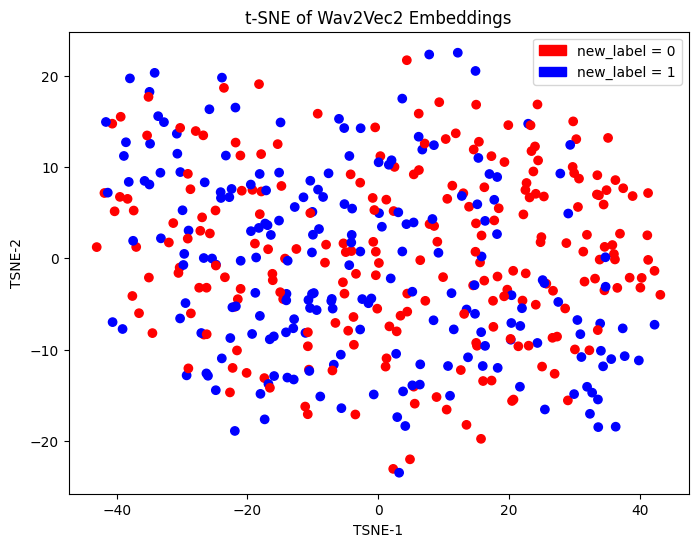

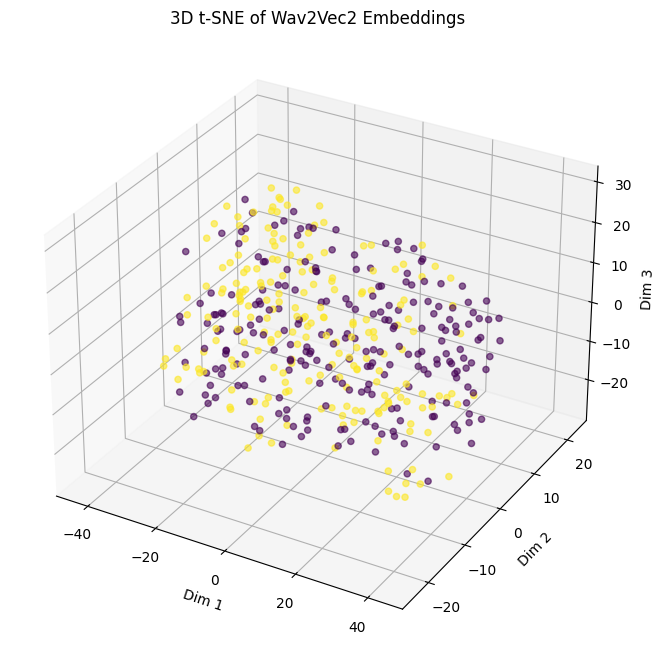

In [17]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch
import torchaudio
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from myDataset import load_mono_audio
from models.wav2vec2_encoder import Wav2Vec2Encoder
from tqdm import tqdm
import numpy as np


# 1. 모델 로딩
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base") # baseline
# model = Wav2Vec2Encoder()
# model.load_state_dict(torch.load("first_contrastive_wav2vec2.pt"))
model.eval()

def extract_embedding(audio):
    
    waveform = load_mono_audio(audio)
    input_values = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt").input_values

    # 3. Embedding 추출 (frame-level)
    with torch.no_grad():
        outputs = model(input_values)
        embeddings = outputs.last_hidden_state.squeeze(0)  # (T, hidden_dim)

    # 4. Pooling or downsampling (선택)
    # 예: mean pooling (utterance-level)
    pooled_embedding = embeddings.mean(dim=0).numpy().reshape(1, -1)

    # 또는 frame-level 시각화 위해 subsample
    # frame_embeddings = embeddings[::5].numpy()  # e.g., 5프레임마다 하나씩 사용
    return pooled_embedding

df = pd.read_csv('/home/selinawisco/ssd_contrastive/datasets/r1.train.csv')
df = df[df['target_text']=='사탕']

tqdm.pandas()
df['embedding'] = df['audio'].progress_map(extract_embedding)

df = df[df['embedding'].notnull()]
X = np.stack(df['embedding'].values)
print(X.shape)

tsne = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(np.squeeze(X))

import matplotlib.patches as mpatches

colors = ['red', 'blue']  # color map used by default for labels 0 and 1
label_legend = [
    mpatches.Patch(color=colors[0], label='new_label = 0'),
    mpatches.Patch(color=colors[1], label='new_label = 1'),
]

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['new_label'].map({0: colors[0], 1: colors[1]}))
plt.legend(handles=label_legend)
plt.title("t-SNE of Wav2Vec2 Embeddings")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()

# 2D 시각화
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['new_label'])
# plt.title("t-SNE of Wav2Vec2 Embeddings")
# plt.show()

# 3D 시각화
from mpl_toolkits.mplot3d import Axes3D  # for 3D projection

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=df['new_label'], alpha=0.6)
ax.set_title("3D t-SNE of Wav2Vec2 Embeddings")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")

plt.show()



/home/selinawisco/anaconda3/envs/asr/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/home/selinawisco/anaconda3/envs/asr/lib/python3.10/site-packages/transformers/configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 432/432 [00:22<00:00, 19.21it/s]


(432, 768)


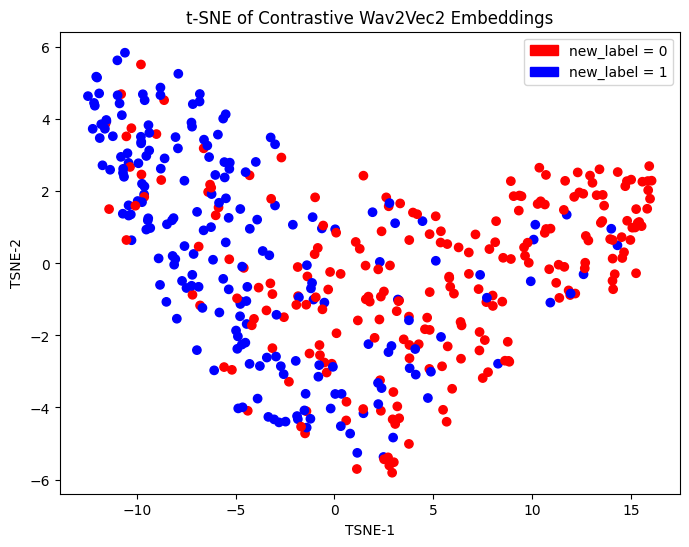

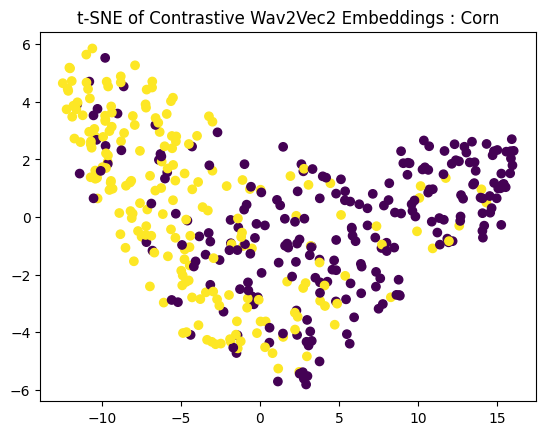

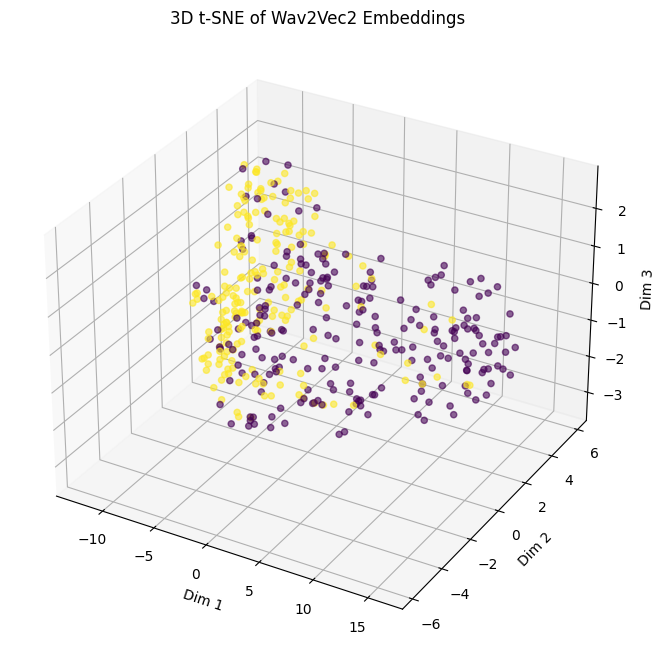

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch
import torchaudio
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from myDataset import load_mono_audio
from models.wav2vec2_encoder import Wav2Vec2Encoder
from tqdm import tqdm
import numpy as np


# 1. 모델 로딩
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
# model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base") # baseline
model = Wav2Vec2Encoder()
model.load_state_dict(torch.load("first_contrastive_wav2vec2.pt"))
model.eval()

def extract_embedding(audio):
    
    waveform = load_mono_audio(audio)
    input_values = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt").input_values

    # 3. Embedding 추출 (frame-level)
    with torch.no_grad():
        outputs = model(input_values)
        embeddings = outputs.squeeze(0)  # (T, hidden_dim)

    # 4. Pooling or downsampling (선택)
    # 예: mean pooling (utterance-level)
    # pooled_embedding = embeddings.mean(dim=0).numpy().reshape(1, -1)

    # 또는 frame-level 시각화 위해 subsample
    # frame_embeddings = embeddings[::5].numpy()  # e.g., 5프레임마다 하나씩 사용
    return embeddings

df = pd.read_csv('/home/selinawisco/ssd_contrastive/datasets/r1.train.csv')
df = df[df['target_text']=='사탕']

tqdm.pandas()
df['embedding'] = df['audio'].progress_map(extract_embedding)

df = df[df['embedding'].notnull()]
X = np.stack(df['embedding'].values)
print(X.shape)

tsne = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(np.squeeze(X))
# min_x, min_y, max_x, max_y = 0, 0, 30, 30
# plt.xlim(min_x, max_x)
# plt.ylim(min_y, max_y)

import matplotlib.patches as mpatches

colors = ['red', 'blue']  # color map used by default for labels 0 and 1
label_legend = [
    mpatches.Patch(color=colors[0], label='new_label = 0'),
    mpatches.Patch(color=colors[1], label='new_label = 1'),
]

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['new_label'].map({0: colors[0], 1: colors[1]}))
plt.legend(handles=label_legend)
plt.title("t-SNE of Contrastive Wav2Vec2 Embeddings")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()

# 2D 시각화
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['new_label'])
plt.title("t-SNE of Contrastive Wav2Vec2 Embeddings : Corn")
plt.show()

# 3D 시각화
from mpl_toolkits.mplot3d import Axes3D  # for 3D projection

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=df['new_label'], alpha=0.6)
ax.set_title("3D t-SNE of Wav2Vec2 Embeddings")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")

plt.show()



In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

from models.wav2vec2_encoder import Wav2Vec2Encoder
from myDataset import load_mono_audio

# Load processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")

# Load both models
baseline_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")

contrastive_model = Wav2Vec2Encoder()
contrastive_model.load_state_dict(torch.load("first_contrastive_wav2vec2.pt"))

baseline_model.eval()
contrastive_model.eval()

# Load data
df = pd.read_csv('/home/selinawisco/ssd_contrastive/datasets/r1.train.csv')
df = df[df['target_text'] == '사탕'].reset_index(drop=True)

# Containers
embeddings = []
labels = []
model_types = []

def extract_embedding(model, audio_path):
    waveform = load_mono_audio(audio_path)
    input_values = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt").input_values
    with torch.no_grad():
        outputs = model(input_values)
        hidden_states = outputs.last_hidden_state.squeeze(0)  # (T, D)
        pooled = hidden_states.mean(dim=0).numpy()            # (D,)
    return pooled

# Run extraction
for i, row in tqdm(df.iterrows(), total=len(df)):
    audio_path = row['audio']
    new_label = row['new_label']
    try:
        # Baseline embedding
        emb_base = extract_embedding(baseline_model, audio_path)
        embeddings.append(emb_base)
        labels.append(new_label)
        model_types.append("baseline")

        # Contrastive embedding
        emb_cont = extract_embedding(contrastive_model, audio_path)
        embeddings.append(emb_cont)
        labels.append(new_label)
        model_types.append("contrastive")
    except Exception as e:
        print(f"Error on {audio_path}: {e}")

# t-SNE
X = np.stack(embeddings)
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Encode new_label for color
label_encoder = LabelEncoder()
label_colors = label_encoder.fit_transform(labels)  # 0 or 1

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Marker style per model
for model_type, marker in zip(['baseline', 'contrastive'], ['o', '^']):
    indices = [i for i, m in enumerate(model_types) if m == model_type]
    ax.scatter(
        X_tsne[indices, 0],
        X_tsne[indices, 1],
        X_tsne[indices, 2],
        c=[label_colors[i] for i in indices],
        cmap='Set1',
        label=f'{model_type}',
        marker=marker,
        alpha=0.7,
        edgecolors='w',
        linewidths=0.5
    )

# Legend for new_label (color)
from matplotlib.lines import Line2D
color_legend = [
    Line2D([0], [0], marker='o', color='w', label=f"new_label = {label_encoder.classes_[i]}",
           markerfacecolor=plt.cm.Set1(i / len(label_encoder.classes_)), markersize=8)
    for i in range(len(label_encoder.classes_))
]

# Legend for model type (marker)
shape_legend = [
    Line2D([0], [0], marker='o', color='gray', label='baseline', linestyle=''),
    Line2D([0], [0], marker='^', color='gray', label='contrastive', linestyle='')
]

ax.legend(handles=color_legend + shape_legend, title="Legend", loc='best')

ax.set_title("3D t-SNE of Baseline vs Contrastive Wav2Vec2 Embeddings (사탕)")
ax.set_xlabel("TSNE-1")
ax.set_ylabel("TSNE-2")
ax.set_zlabel("TSNE-3")
plt.show()
